In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# we add some important functions in main_functions 
import imp
func_collect = imp.load_source('main_functions', 'E:\Machine Learning Work\Elictro Pi\Concrete Data\main_functions.py')
from sklearn.tree import DecisionTreeRegressor

In [3]:
dataSet = pd.read_excel('..\\Concrete_Data.xls')
dataSet.columns = ['Cement','Slag','Ash','Water','Superplasticizer','Coarse','Fine','Age','strength']

In [4]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Slag              1030 non-null   float64
 2   Ash               1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   Coarse            1030 non-null   float64
 6   Fine              1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
dataSet.isnull().sum()

Cement              0
Slag                0
Ash                 0
Water               0
Superplasticizer    0
Coarse              0
Fine                0
Age                 0
strength            0
dtype: int64

In [6]:
dataSet.describe()

,Cement,Slag,Ash,Water,Superplasticizer,Coarse,Fine,Age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [7]:
dataSet.corr()

,Cement,Slag,Ash,Water,Superplasticizer,Coarse,Fine,Age,strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


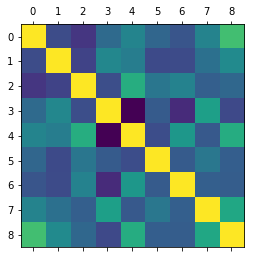

In [8]:
plt.matshow(dataSet.corr())
plt.show()

C:\Users\Geek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262074B3978>,
      dtype=object)

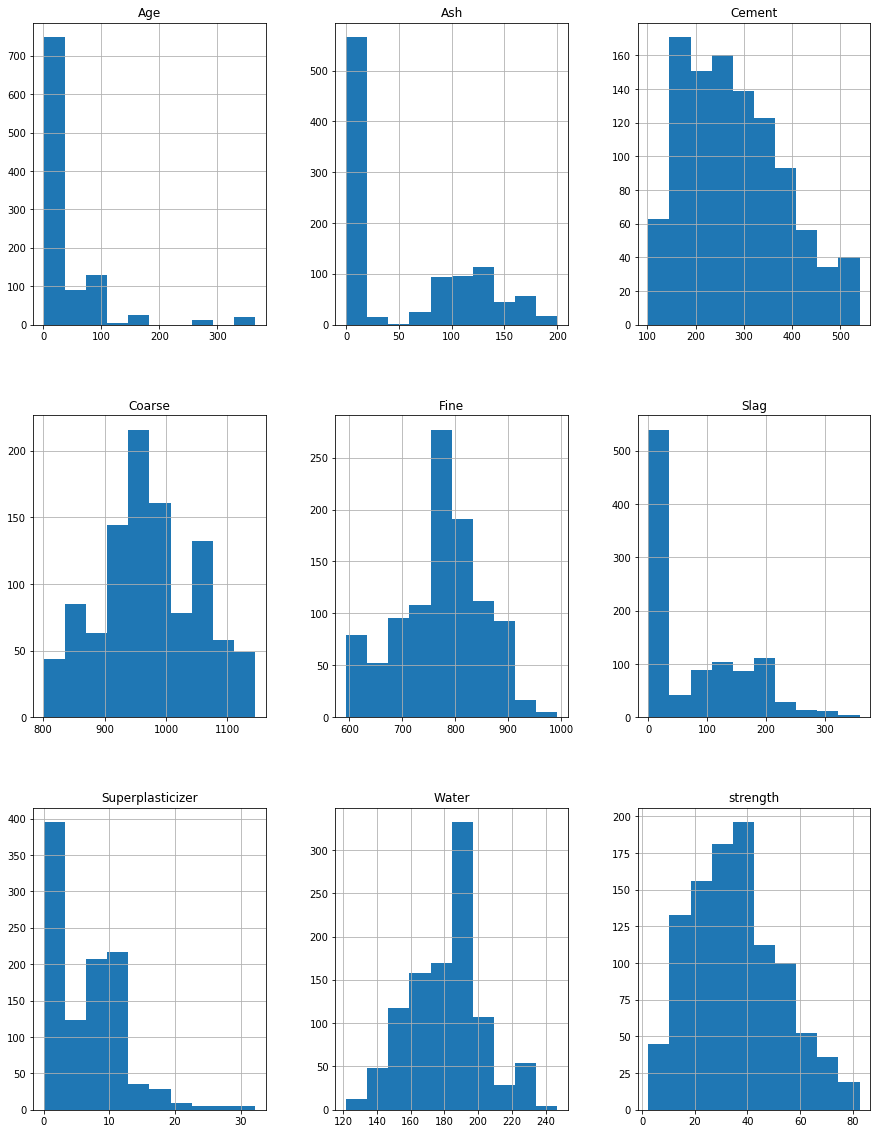

In [9]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataSet.hist(ax = ax)

In [10]:
X = dataSet.iloc[:,[0,1,2,3,7]].values
y = dataSet.iloc[:,-1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.2,random_state=0)

In [12]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
func_collect.score(y_pred,y_test)
func_collect.hypothesis(model)

Mean Squared Error :  41.97852088325329
R______Score Error :  0.8467818776642216
DecisionTreeRegressor  Has no coefficient and collinearity


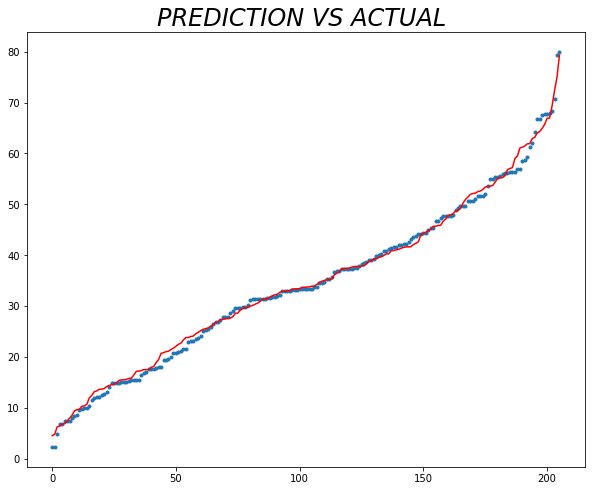

In [13]:
func_collect.display(y_pred,y_test)